In [1]:
import tensorflow as tf  # deep learning library. Tensors are just multi-dimensional arrays
#print(tf.__version__)

In [2]:
mnist = tf.keras.datasets.mnist  # mnist is a dataset of 28x28 images of handwritten digits and their labels
(x_train, y_train),(x_test, y_test) = mnist.load_data()  # unpacks images to x_train/x_test and labels to y_train/y_test

11493376/11490434 [==============================] - 45s 4us/step


In [3]:
import matplotlib.pyplot as plt

plt.imshow(x_test[0],cmap=plt.cm.binary)
plt.show()
#print(x_train[0])

<Figure size 640x480 with 1 Axes>

In [4]:
x_train = tf.keras.utils.normalize(x_train, axis=1)  # scales data between 0 and 1
x_test = tf.keras.utils.normalize(x_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))  # our output layer. 10 units for 10 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model


W0808 16:54:08.396075  3288 deprecation.py:506] From E:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Epoch 1/3
60000/60000 [==============================] - 9s 152us/sample - loss: 0.2622 - acc: 0.9237
Epoch 2/3
60000/60000 [==============================] - 8s 135us/sample - loss: 0.1049 - acc: 0.9675
Epoch 3/3
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0718 - acc: 0.9773


In [5]:

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss,val_acc)# model's loss (error) # model's accuracy

10000/10000 [==============================] - 1s 83us/sample - loss: 0.0873 - acc: 0.9736
0.08734237357154488 0.9736


In [6]:
model.save('num_reader.model')


In [7]:
new_model = tf.keras.models.load_model('num_reader.model')
predictions = new_model.predict(x_test)
print(predictions)

W0808 16:54:55.721379  3288 deprecation.py:506] From E:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0808 16:54:55.723375  3288 deprecation.py:506] From E:\Anaconda3\envs\tensorflow\lib\site-packages\tensorflow\python\ops\init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0808 16:54:56.095211  3288 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.

[[7.18231474e-09 9.11467950e-08 4.32991692e-06 ... 9.99988556e-01
  1.33265345e-08 9.03666660e-07]
 [7.72362174e-09 2.77871644e-04 9.99686599e-01 ... 9.95204630e-08
  6.79685229e-07 1.63930480e-10]
 [2.73797678e-08 9.99742687e-01 2.39668116e-05 ... 6.76386117e-05
  1.51323024e-04 8.02801765e-07]
 ...
 [3.54434454e-10 1.45526997e-07 3.86551235e-09 ... 5.72696408e-05
  4.62805446e-07 5.62486748e-05]
 [2.20296370e-05 6.69315227e-07 1.46020209e-08 ... 2.45754592e-07
  1.57941235e-04 6.48148646e-09]
 [1.44615839e-07 4.25651159e-09 3.11027364e-08 ... 4.31352142e-11
  1.00113063e-07 7.82391818e-10]]


In [8]:
import numpy as np

print(np.argmax(predictions[1]))

2


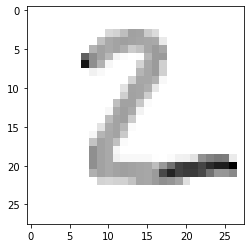

In [9]:
plt.imshow(x_test[1],cmap=plt.cm.binary)
plt.show()